<a href="https://colab.research.google.com/github/derek-shing/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_223_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

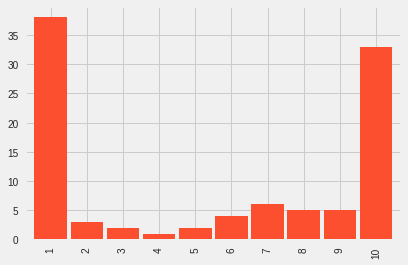

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

In [4]:
plt.style.available

['seaborn-dark-palette',
 'seaborn-deep',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'Solarize_Light2',
 'seaborn',
 'fivethirtyeight',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-bright',
 'fast',
 'ggplot',
 'seaborn-dark',
 'seaborn-poster',
 'grayscale',
 'seaborn-paper',
 'seaborn-talk',
 'dark_background',
 'seaborn-white',
 'classic',
 'tableau-colorblind10',
 'seaborn-notebook',
 'seaborn-whitegrid',
 'seaborn-muted',
 'bmh',
 'seaborn-ticks']

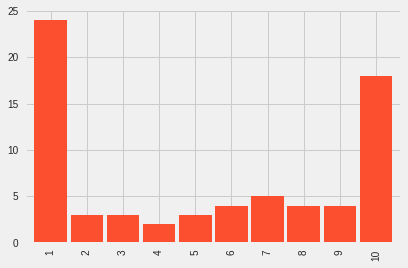

In [5]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

[[<matplotlib.axis.YTick at 0x7ffa04fbb0b8>,
 Text(0, 0.5, 'Percent of total votes'),
 Text(0.5, 0, 'Rating')]

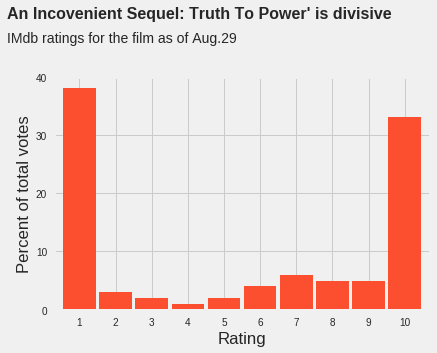

In [6]:


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='C1', width=0.9);

ax.tick_params(labelrotation=0)

#ax.set(title="An Incovenient Sequel: Truth To Power' is divisive")

ax.text(x=-2,y=50,s="An Incovenient Sequel: Truth To Power' is divisive", fontsize=16,fontweight='bold')

ax.text(x=-2,y=46,s="IMdb ratings for the film as of Aug.29")

ax.set(xlabel='Rating', ylabel='Percent of total votes', yticks=range(0,50,10))


In [7]:
display(example)

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [9]:
df.shape


(80053, 27)

In [0]:
width, height = df.shape

In [0]:
pd.options.display.max_columns=500

In [0]:
df.T

In [0]:
df.timestamp = pd.to_datetime(df.timestamp)

In [0]:
df.timestamp.describe()

In [0]:
df=df.set_index('timestamp')

In [0]:
df.head()

In [0]:
condition = (df.category=='IMDb users')

In [0]:
df[condition]

In [0]:
lastday= df['2017-08-29']

In [24]:
 lastday = lastday[condition]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [0]:
final=lastday.tail(1)

In [0]:
columns = [str(i)+'_pct' for i in range(1,11)]

In [0]:
final = final[columns]

In [0]:
data = final.T

In [35]:
data.head()

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1


In [0]:
data.index=range(1,11)

[[<matplotlib.axis.YTick at 0x7ffa02825748>,
 Text(0, 0.5, 'Percent of total votes'),
 Text(0.5, 0, 'Rating')]

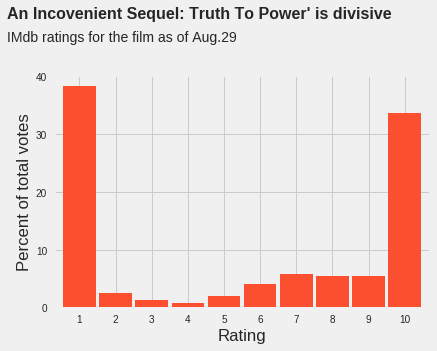

In [41]:
plt.style.use('fivethirtyeight')


ax = data.plot.bar(color='C1', width=0.9, legend=None);

ax.tick_params(labelrotation=0)

#ax.set(title="An Incovenient Sequel: Truth To Power' is divisive")

ax.text(x=-2,y=50,s="An Incovenient Sequel: Truth To Power' is divisive", fontsize=16,fontweight='bold')

ax.text(x=-2,y=46,s="IMdb ratings for the film as of Aug.29")

ax.set(xlabel='Rating', ylabel='Percent of total votes', yticks=range(0,50,10))

In [0]:
#ax.get_legend().remove()

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









**Thanksgiving 2015**

In [0]:


thanksgiving_df =pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv')

In [48]:
thanksgiving_df.shape

(1058, 65)

In [0]:
pd.options.display.max_rows=500

In [0]:
#Get subset of the columns

subset = thanksgiving_df.loc[:,'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots':'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1']

In [0]:
subset

In [67]:
thanksgiving_df.head(1).T

,0
RespondentID,4337954960
Do you celebrate Thanksgiving?,Yes
What is typically the main dish at your Thanksgiving dinner?,Turkey
What is typically the main dish at your Thanksgiving dinner? - Other (please specify),NaN
How is the main dish typically cooked?,Baked
How is the main dish typically cooked? - Other (please specify),NaN
What kind of stuffing/dressing do you typically have?,Bread-based
What kind of stuffing/dressing do you typically have? - Other (please specify),NaN
What type of cranberry saucedo you typically have?,None
What type of cranberry saucedo you typically have? - Other (please specify),NaN


In [65]:
subset.columns

Index(['Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese',
       'Which of these side dishes aretypically served at your Thanksgivin

In [66]:
name= subset.columns[0]
subset[name].value_counts()

Carrots    242
Name: Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots, dtype: int64